In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

In [2]:

pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [29]:
df=pd.read_excel('amazon_final.xlsx')
gdf=pd.read_excel('amazon_final.xlsx')
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
dataset_train = train_data
training_set = dataset_train.iloc[:, [1,2,3,4,5,7]].values

In [4]:
len(training_set)

1007

In [5]:
# df.isnull().values.any()
# df = df.dropna()
# print(df)

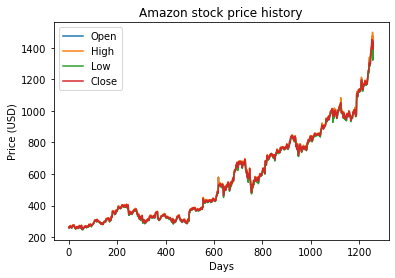

In [22]:
plt.figure()
plt.plot(df["open"])
plt.plot(df["high"])
plt.plot(df["low"])
plt.plot(df["close"])
plt.title('Amazon stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

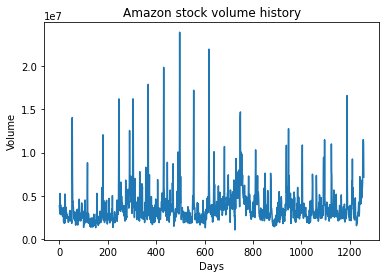

In [25]:
plt.figure()
plt.plot(df["volume"])
plt.title('Amazon stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

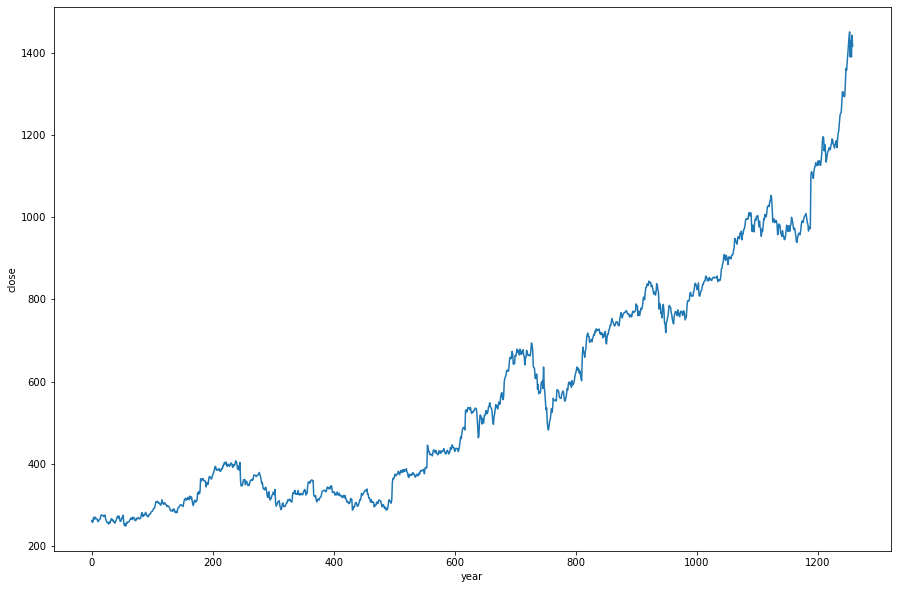

,date,open,high,low,close,volume,Name,Sentiment,year
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.955800,2013
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,0.000000,2013
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,0.000000,2013
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,0.000000,2013
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.000000,2013
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN,-0.030175,2018
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN,0.000000,2018
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN,0.999100,2018
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN,0.000000,2018


In [45]:

# gdf["date"] = pd.to_datetime(gdf["date"])

# gdf["year"]= gdf["date"].dt.year
# plt.figure(figsize = (15,10))
# plt.plot(gdf["close"])
# plt.xlabel("year")
# plt.ylabel("close")
# # plt.legend(loc='best')
# plt.show()

# gdf


0          261.950
1          519.160
2          777.860
3         1047.330
4         1316.570
           ...    
1254    720612.401
1255    722042.351
1256    723432.351
1257    724875.191
1258    726291.971
Name: close, Length: 1259, dtype: float64
            date     open     high       low    close    volume  Name  \
0     2013-02-08   261.40   265.25   260.555   261.95   3879078  AMZN   
1     2013-02-11   263.20   263.25   256.600   257.21   3403403  AMZN   
2     2013-02-12   259.19   260.16   257.000   258.70   2938660  AMZN   
3     2013-02-13   261.53   269.96   260.300   269.47   5292996  AMZN   
4     2013-02-14   267.37   270.65   265.400   269.24   3462780  AMZN   
...          ...      ...      ...       ...      ...       ...   ...   
1254  2018-02-01  1445.00  1459.88  1385.140  1390.00   9113808  AMZN   
1255  2018-02-02  1477.39  1498.00  1414.000  1429.95  11125722  AMZN   
1256  2018-02-05  1402.62  1458.98  1320.720  1390.00  11494985  AMZN   
1257  2018-02-06  1

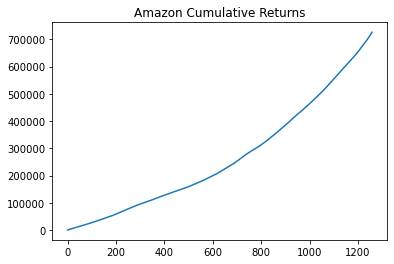

In [6]:
dr = df['close'].cumsum()
print(dr)
dr.plot()
plt.title('Amazon Cumulative Returns')
print(df)

Text(0.5, 1.0, 'Amazon Autocorrelation plot')

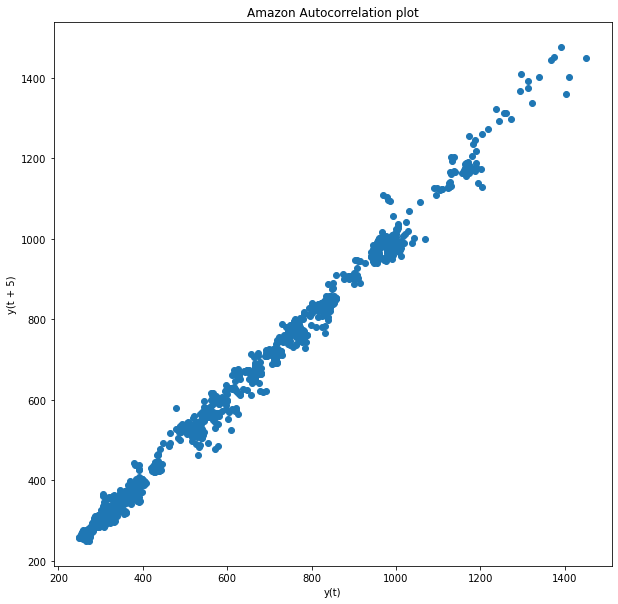

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['open'], lag=5)
plt.title('Amazon Autocorrelation plot')

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(training_set)

In [9]:
training_set_scaled = training_set

In [10]:
X_train = []
y_train = []
for i in range(60, 1007):
    X_train.append(training_set_scaled[i-60:i, :])
    y_train.append(training_set_scaled[i, 3])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.array(X_train)
print(X_train.shape)

(947, 60, 6)


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import RMSprop, Adam

In [12]:
regressor = Sequential()

regressor.add(LSTM(units = 100, dropout=0.0, kernel_initializer='random_uniform', recurrent_dropout=0.0, return_sequences = True, input_shape = ( 60, 6)))
regressor.add(Dropout(0.4))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 60, dropout=0.0))
regressor.add(Dropout(0.4))

regressor.add(Dense(units = 20, activation='gelu'))
regressor.add(Dense(units = 20, activation='gelu'))

opt = Adam(lr=0.0001)

regressor.compile(optimizer = opt, loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 20)

Epoch 1/200
48/48 [==============================] - 4s 26ms/step - loss: 0.2511
Epoch 2/200
48/48 [==============================] - 1s 28ms/step - loss: 0.1373
Epoch 3/200
48/48 [==============================] - 1s 26ms/step - loss: 0.1050
Epoch 4/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0824
Epoch 5/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0781
Epoch 6/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0758
Epoch 7/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0688
Epoch 8/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0682
Epoch 9/200
48/48 [==============================] - 1s 26ms/step - loss: 0.0707
Epoch 10/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0565
Epoch 11/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0631
Epoch 12/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0577
Epoch 13/200
48/48 [=====

48/48 [==============================] - 1s 27ms/step - loss: 0.0149
Epoch 101/200
48/48 [==============================] - 1s 28ms/step - loss: 0.0122
Epoch 102/200
48/48 [==============================] - 1s 28ms/step - loss: 0.0117
Epoch 103/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0098
Epoch 104/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0094
Epoch 105/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0090
Epoch 106/200
48/48 [==============================] - 1s 28ms/step - loss: 0.0085
Epoch 107/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0076
Epoch 108/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0086
Epoch 109/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0070
Epoch 110/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0074
Epoch 111/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0084
Epoch 112/200
48/4

48/48 [==============================] - 1s 28ms/step - loss: 0.0020
Epoch 199/200
48/48 [==============================] - 1s 27ms/step - loss: 0.0020
Epoch 200/200
48/48 [==============================] - 1s 28ms/step - loss: 0.0021


In [13]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 20)

Epoch 1/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0023
Epoch 2/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0023
Epoch 3/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0020
Epoch 4/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0021
Epoch 5/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0022
Epoch 6/10
48/48 [==============================] - 1s 26ms/step - loss: 0.0022
Epoch 7/10
48/48 [==============================] - 1s 26ms/step - loss: 0.0024
Epoch 8/10
48/48 [==============================] - 1s 26ms/step - loss: 0.0019
Epoch 9/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0020
Epoch 10/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0020


In [14]:
#BEST!! AMAZON # RMSE 36 220 epochs closing value
# regressor = Sequential()

# regressor.add(LSTM(units = 100, dropout=0.0, kernel_initializer='random_uniform', recurrent_dropout=0.0, return_sequences = True, input_shape = ( 60, 6)))
# regressor.add(Dropout(0.4))

# # regressor.add(LSTM(units = 50, return_sequences = True))
# # regressor.add(Dropout(0.2))

# # regressor.add(LSTM(units = 50, return_sequences = True))
# # regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 60, dropout=0.0))
# regressor.add(Dropout(0.4))

# regressor.add(Dense(units = 20, activation='gelu'))
# regressor.add(Dense(units = 20, activation='gelu'))

# opt = Adam(lr=0.0001)

# regressor.compile(optimizer = opt, loss = 'mean_squared_error')

# regressor.fit(X_train, y_train, epochs = 220, batch_size = 20)

In [15]:
dataset_test = test_data
real_stock_price = dataset_test.iloc[:, 4].values


In [16]:
dataset_total = pd.concat((dataset_train[['open', 'high','low','close','volume','Sentiment']], dataset_test[['open', 'high','low','close','volume','Sentiment']]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# print(inputs[0])
# inputs = inputs.reshape(-1,1)
# print(inputs[0])
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
# X_test = np.array(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
buffered_predicted_stock_price = np.array([[0,0,0,i[0],0,0] for i in predicted_stock_price])  
predicted_stock_price = sc.inverse_transform(buffered_predicted_stock_price)
predicted_stock_price = predicted_stock_price[:,3]
                                    

    

In [17]:
def return_rmse(test,predicted):
    # START_CODE_HERE
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    # END_CODE_HERE

In [18]:
return_rmse(real_stock_price,predicted_stock_price)

The root mean squared error is 35.022655816670365.


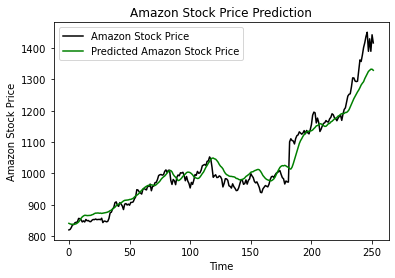

In [19]:
plt.plot(real_stock_price, color = 'black', label = 'Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

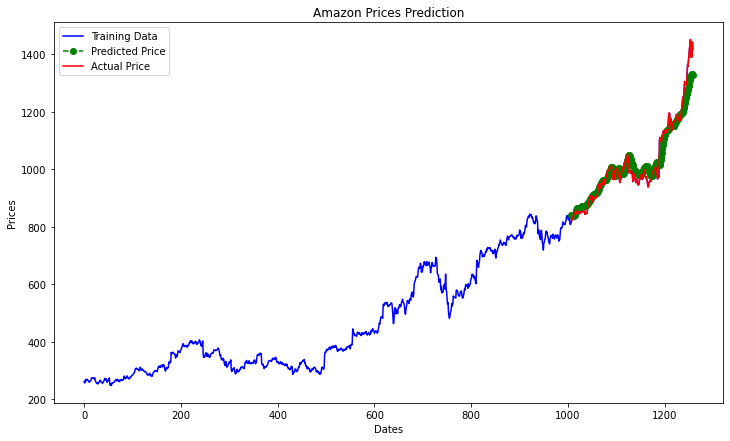

In [47]:
plt.figure(figsize=(12,7))
plt.plot(df['close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predicted_stock_price, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.title('Amazon Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(0,1260, 60), df['date'][0:1260:60])
plt.legend()